**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

Tamanho da imagem:  (3692, 2812)
Tamanho da imagem redimensionada:  (887, 675)


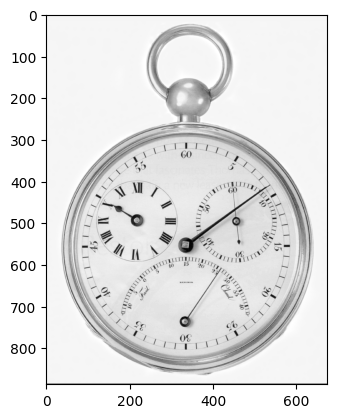

In [52]:
# type your code here
# Python code to read image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

class Resizor:
    def __init__(self, path) -> None:
        self.path = path
        self.result = None
        self.img = None

    def setPath(self, path):
        self.path = path

    def showImage(self):
        plt.imshow(self.img, cmap = 'gray', vmin = 0, vmax = 255)

    def getImage(self):
        return cv2.imread(self.path, cv2.IMREAD_GRAYSCALE)

    def resize(self, oldDpi, newDpi, log = False):
        self.img = self.getImage()

        if log:
            print('Tamanho da imagem: ', self.img.shape)

        height, width = self.img.shape
        step = oldDpi / newDpi
        roundStep = math.ceil(step)

        newHeight = math.ceil((height / step))
        newWidth = math.ceil((width / step))

        if log:
            print('Tamanho da imagem redimensionada: ', (newHeight, newWidth))
            
        newImage = np.zeros((newHeight, newWidth))

        i = 0
        for pointA in np.arange(0, height, step):
            j = 0
            for pointB in np.arange(0, width, step):
                roundA = math.floor(pointA)
                roundB = math.floor(pointB)
                endPointI = roundA + roundStep
                endPointJ = roundB + roundStep

                block = self.img[roundA:endPointI, roundB:endPointJ]

                newValue = 0
                for line in block:
                    for col in line:
                        newValue += col
                
                newImage[i][j] = np.round(newValue / (roundStep ** 2))
            
                j += 1
            i += 1

        self.result = newImage

    def showResult(self):
        plt.imshow(self.result, cmap = 'gray', vmin = 0, vmax = 255)
                

img = Resizor("relogio.tif")
img.resize(1250, 300, True)
img.showResult()


2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão